# Aula 6 - Limpeza e transformação de dados

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Limpeza de Dados (dropna, fillna, isnull, notnull, replace, duplicated, drop_duplicated)
- 2) Transformação de Dados (cut, qcut, get_dummies)


### Objetivos

Apresentar como identificamos valores nulos, discutir melhores formas de tratá-los além de trabalhar com variáveis dummies.


### Habilidades a serem desenvolvidas nessa aula

Ao final da aula o aluno deve:

- Saber como identificar valores nulos e como tratá-los
- Identificar quando utilizar variáveis dummies e como criá-las
- Como converter variáveis numéricas em categóricas
____
____
____

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("data/titanic.csv")

## Limpeza de Dados: Dados Faltantes

### `.isna() e isnull()`
retorna um df booleano indicando se existe um nulo naquela posição. `pd.isnull()` é um alias para `pd.isna()` dentro do python como podemos ver na <a href="https://github.com/pandas-dev/pandas/blob/0409521665bd436a10aea7e06336066bf07ff057/pandas/core/dtypes/missing.py#L109">documentação</a>. O pandas dataframe é baseado nos df do R, onde null e na tem sentidos distintos.

Para termos a quantidade de nans em cada coluna podemos somar os valores true:

### `.notnull()`

retorna df com True ou False, com True para elementos não nulos

### `.dropna()`

elimina nulos em todo o df ou em colunas específicas quando utilizado o argumento `subset`. É um dos métodos que aceita o parâmetro `inplace`.


### `.fillna()`

preeche os valores nulos com valores especificados dentro do método. Esses valores podem tanto ser uma constante quanto aplicar técnicas como o backfill e o forward fill.

Parâmetros úteis:

   * `method {‘bfill’,‘ffill’, None}`, default None <br>
       Preenche os nas propagando o último valor válido para frente (ffill) ou utiliza próxima observação válida para preencher os nulos (bfill).
   * `limit`, default None <br>
       Quantidade máxima de nulos sequenciais a ser preenchido. 
   * `axis` {0 para ‘index’, 1 para ‘colunas’} <br>
       Eixo no qual se quer preencher os nulos
   * `inplace` {booleano}, default False


### Voltando ao dataset do titanic...

Quais soluções poderíamos utilizar para preencher os nulos em Age? <br>
E as cabines nulas? <br>
E os portões de embarque nulos? <br>
Qual os possíveis problemas que podemos encontrar utilizando essas abordagens? <br>


_________
_________
**Exercício:** Ordene as colunas Pclass e Fare, nessa ordem e ascendente, e preencha os nulos utilizando o método foward fill.

_________
_________

### `.interpolate()`
Faz a interpolação dos missing de acordo com o método escolhido.
[Documentação](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.Series.interpolate.html)

Principais parâmetros: `Series.interpolate(method='linear', order=None, axis=0, limit=None, inplace=False)`

In [ ]:
s = pd.DataFrame([0, 1, np.nan, 3, 4, np.nan, 400], columns=['original'])


## Substituição de valores

### `.replace()`

substitui elementos dentro do df. É um dos métodos que aceita o parâmetro `inplace`.


In [ ]:
# para apenas uma troca


In [ ]:
# para mais de uma troca


___________________
___________________

**Exercício**: Troque os valores abreviados do portão de embarque para seus respectivos nomes 
(C = Cherbourg; Q = Queenstown; S = Southampton) e preencha os dados faltantes com o portão mais frequente.

___________________
___________________


## Limpeza de Dados: Dados duplicados
### `.duplicated()` e `.drop_duplicated()`

O `.duplicated()` retorna uma máscara series booleana indicando se determinada linha possui duplicados ou não. Já o `.drop_duplicated()`, elimina as linhas duplicadas. <br>
Parâmetros do `.drop_duplicated()`:

   * `subset` -  seleciona colunas para serem utilizadas na comparação de linhas duplicadas
   * `keep` - {‘first’, ‘last’, False} (default ‘first’) Determina qual duplicado manter
   * `inplace` - (default False) Se False retorna uma cópia do df com as alterações, se True faz as modificações no próprio df



In [ ]:
# vamos criar um df que possua linhas duplicadas
df_dup = df.copy()

df_dup.loc[891, :] = df_dup.loc[0, :]
df_dup.loc[892, :] = df_dup.loc[1, :]
df_dup.loc[893, :] = df_dup.loc[1, :]

print(df.shape, df_dup.shape)

_______________________
_______________________
**Exercícios:** Elimine os duplicados considerando as colunas 'brand' e 'style' mantendo o último valor.

In [ ]:
df_exerc = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, np.nan, 3.5, 15, 5]
})

df_exerc

__________
__________


## Transformação de dados

### Variáveis categóricas -> booleanas


Variáveis categóricas são aquelas que representam grupos ou classes dentro dos nossos dados. Elas podem ser de dois tipos:
* ordinais: <br>
   possuem uma ordem que tem um sentido. Por exemplo, em rendimentos poderíamos ter: classe alta > classe média > classe baixa  
* nominais: <br>
   não possuem uma ordem válida. Por exemplo: sexo e CEP.

<img src="variaveis_categoricas.jpeg" style="width: 600px">

Criamos variáveis dummies quando convertemos variáveis categóricas para valores binários que passarão a representar cada uma das classes. 

#### `.get_dummies()`

O método `pd.get_dummies()` converte as variáveis categóricas em numéricas separando cada categoria em uma coluna única.
<br>
<br>
<a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html">Parâmetros:</a> <br>
`pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)`

### Variáveis numéricas -> categóricas

Neste caso criamos grupos para representar nossas variáveis numéricas. Um exemplo é quando convertemos a idade das pessoas em grupos de crianças, jovens, adultos e idosos.

#### `.cut()`

O método `.cut()` ordena os dados, separa em bins e computa para cada linha do df qual é o grupo que ela pertence. O `.cut()` automaticamente define como serão os bins, ou seja, onde serão feitas as quebras, de tal forma que esses grupos estejam espaçados uniformemente indo do menor valor encontrado até o maior. Com isso teremos quebras uniformemente espaçadas mas com quantidades distintas de amostras em cada um dos grupos criados.

Ele é muito utilizado para **transformar variáveis contínuas em categóricas**. Por exemplo, podemos converter o valor númerico da idade em grupos de criança, jovem, adulto e idoso.
<br><br>
<a href='https://pandas.pydata.org/docs/reference/api/pandas.cut.html'>Parâmetros:</a> <br>
`pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)`

Ao informar quantidade de grupos o pd.cut() escolhe os bins com o mesmo tamanho de janela :


Podemos passar o nome dos grupos e transformar a variável numérica diretamente em categórica utilizando o parâmetro `labels`.


Ao invés de indicarmos a quantidade de grupos podemos passar uma lista com os valores de início e fim dos bins:

<a href='https://towardsdatascience.com/discretisation-using-decision-trees-21910483fa4b'>Discretização utilizando decision trees</a>

#### `.qcut()`
O `pd.qcut()` é utilizado quando queremos discretizar nossos dados em quantis, de forma a termos uma mesma quantidade de valores em cada grupo. Ao informar a quantidade de grupos o `pd.qcut()` ele automaticamente escolhe os bins para conseguir manter essa proporção equilibrada entre os grupos.

#### `.cut()` x `.qcut()`
   * O comando `.cut()` cria **caixas equidistantes**, mas a **frequência** das amostras é **desigual** em cada caixa
   * O comando `.qcut()` cria **caixas de tamanhos desiguais**, mas a **frequência** das amostras é **igual** em cada caixa.

<br>

[Parâmetros](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html)
<br>
`pandas.qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')`

## Material de aprofundamento

Uma biblioteca interessante para visualizarmos dados faltantes é a `missigno`.

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

## Exercícios

1. Converta os países do dataframe abaixo para variáveis dummies eliminando a primeira coluna e utilizando 'Country' como prefixo no nome das colunas.

In [ ]:
ids = [11, 22, 33, 44, 55, 66, 77]
countries = ['Brasil', 'Argentina', 'Peru', 'Bolívia', 'Uruguai']
sales = [42, 53, 37, 45, 20]



2. Com o dataset do titanic, crie variáveis dummies para grupos de idades de 0 a 20, 21 a 40, 41 a 60 e 61 a 80.

Exemplo de saída desejada:

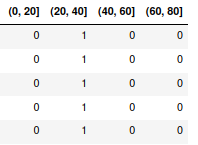

3. Considere os dados do arquivo "german_credit.csv" que contem dados de empréstimos realizados por um banco.<br>
a. Tem nulos nesse df? Se sim, preencha os nulos da forma que o grupo decidir.

b. Crie ranges para as variáveis de idade, quantidade de crédito e duração do empréstimo.

c. Converta as variáveis categóricas em dummies, inclusive as criadas no item anterior.

4. Para esse exercício vamos considerar o dataset https://archive.ics.uci.edu/ml/datasets/automobile que traz a especificação de modelos de carros em 1985.

In [ ]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
obj_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers) #, na_values="?" 
obj_df.head()

a. Esse dataset possui nans? Se sim, o grupo precisa entrar em um acordo de como tratá-los.

b. Esse dataset possui linhas duplicadas?

c. O consumo dos automóveis na cidade e rodovia, representados pelas colunas "city-mpg" e "highway-mpg", respectivamente, estão na unidade mpg (miles per gallon). Converta essas colunas para consumo em L/100km sabendo que a conversão é dada por:

consumo_L_por_100km = 235 / consumo_mpg 

d. Converta as colunas "body_style" e "drive_wheels" para variáveis dummies.

## Referências:
pd.melt(): <br>
https://towardsdatascience.com/shape-tables-like-jelly-with-pandas-melt-and-pivot-f2e13e666d6 <br>
https://pub.towardsai.net/understanding-pandas-melt-pd-melt-362954f8c125

## [Avaliação anônima](https://forms.gle/tShxhxNYhvi6ZmQm8)